In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#Shifting all data from xls format into cleaned up df
lebron_reg_datalist = pd.read_html("data_files/Lebron_Regular_Season.xls")
lebron_reg_data = ""
for i in lebron_reg_datalist:
    lebron_reg_data = i
lebron_reg_data = lebron_reg_data[:22]


jordan_reg_datalist = pd.read_html("data_files/Jordan_Regular_Season.xls")
jordan_reg_data = ""
for i in jordan_reg_datalist:
    jordan_reg_data = i
jordan_reg_data = jordan_reg_data[:19]

jordan_reg_data['GS'] = pd.to_numeric(jordan_reg_data['GS'], errors='coerce').fillna(0).astype(int)

lebron_stats_dict = {}
jordan_stats_dict = {}
# Find out total Seasons played

lebron_stats_dict['seasons played'] = len(lebron_reg_data)
jordan_stats_dict['seasons played'] = len(jordan_reg_data[jordan_reg_data['GS'] != 0])

# Find out total game played
lebron_reg_data['GS'] = lebron_reg_data['GS'].astype(int)
lebron_stats_dict['games played'] = lebron_reg_data['GS'].sum()

jordan_stats_dict['games played'] = jordan_reg_data['GS'].sum()

# Find out Total stats
lebron_reg_data.iloc[:, 5:-1] = lebron_reg_data.iloc[:, 5:-1].apply(pd.to_numeric, errors='coerce')
lebron_reg_data
jordan_reg_data.iloc[:, 5:-1] = jordan_reg_data.iloc[:, 5:-1].apply(pd.to_numeric, errors='coerce')
jordan_reg_data

lebron_stats_dict['total points'] = (lebron_reg_data['G'] * lebron_reg_data['PTS']).sum().round(0)
lebron_stats_dict['total assists'] = (lebron_reg_data['G'] * lebron_reg_data['AST']).sum().round(0)
lebron_stats_dict['total rebounds'] = (lebron_reg_data['G'] * lebron_reg_data['TRB']).sum().round(0)
lebron_stats_dict['total steals'] = (lebron_reg_data['G'] * lebron_reg_data['STL']).sum().round(0)
lebron_stats_dict['total blocks'] = (lebron_reg_data['G'] * lebron_reg_data['BLK']).sum().round(0)

jordan_stats_dict['total points'] = (jordan_reg_data['G'] * jordan_reg_data['PTS']).sum().round(0)
jordan_stats_dict['total assists'] = (jordan_reg_data['G'] * jordan_reg_data['AST']).sum().round(0)
jordan_stats_dict['total rebounds'] = (jordan_reg_data['G'] * jordan_reg_data['TRB']).sum().round(0)
jordan_stats_dict['total steals'] = (jordan_reg_data['G'] * jordan_reg_data['STL']).sum().round(0)
jordan_stats_dict['total blocks'] = (jordan_reg_data['G'] * jordan_reg_data['BLK']).sum().round(0)

# Find out Stats at their final years




C:\Users\User\AppData\Local\Temp\ipykernel_33884\1597707251.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jordan_reg_data['GS'] = pd.to_numeric(jordan_reg_data['GS'], errors='coerce').fillna(0).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_33884\1597707251.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron_reg_data['GS'] = lebron_reg_data['GS'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_33884\1597707251.py:31: SettingWithCopyWarning: 
A value is trying to be set on a cop

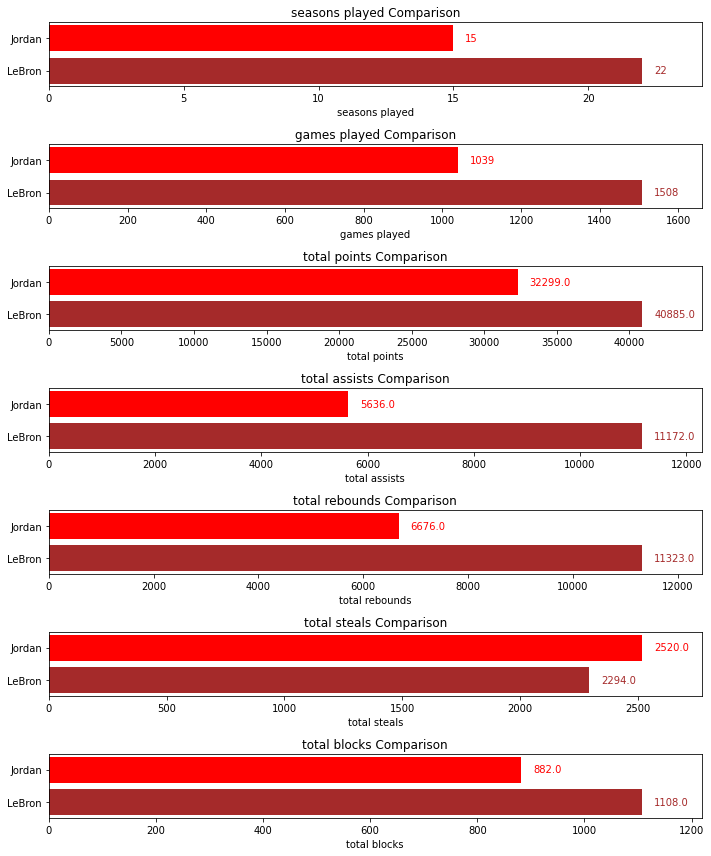

In [ ]:
# Both players Total stats in a side-by-side bar chart
# Create a list of stats to plot
stats = list(lebron_stats_dict.keys())

# Set up subplots
fig, axes = plt.subplots(len(stats), 1, figsize=(10, 12))

# Loop through each stat and create a bar chart
for i, stat in enumerate(stats):
    # Values for the bar chart
    lebron_value = lebron_stats_dict[stat]
    jordan_value = jordan_stats_dict[stat]
    
    # Horizontal bar chart on each subplot
    axes[i].barh(['LeBron', 'Jordan'], [lebron_value, jordan_value], color=['brown', 'red'])
    
    # Title and labels for each subplot
    axes[i].set_title(f'{stat} Comparison')
    axes[i].set_xlabel(stat)
    
    # Adjust x-axis limits with some extra space
    max_value = max(lebron_value, jordan_value)
    axes[i].set_xlim(0, max_value + max_value * 0.1)  # Add 10% space above the max value
    
    # Add labels at the end of each bar
    axes[i].text(lebron_value + max_value * 0.02, 0, f'{lebron_value}', va='center', ha='left')
    axes[i].text(jordan_value + max_value * 0.02, 1, f'{jordan_value}', va='center', ha='left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
lebron_reg_data

,Season,Age,Team,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,...,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,"MVP-9,ROY-1"
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,...,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,"MVP-6,AS,NBA2"
2,2005-06,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,...,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,"MVP-2,AS,NBA1"
3,2006-07,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,...,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,"MVP-5,AS,NBA2"
4,2007-08,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,...,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,"MVP-4,AS,NBA1"
5,2008-09,24,CLE,NBA,SF,81,81,37.7,9.7,19.9,...,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4,"MVP-1,DPOY-2,AS,NBA1"
6,2009-10,25,CLE,NBA,SF,76,76,39.0,10.1,20.1,...,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7,"MVP-1,DPOY-4,AS,NBA1"
7,2010-11,26,MIA,NBA,SF,79,79,38.8,9.6,18.8,...,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7,"MVP-3,DPOY-9,AS,NBA1"
8,2011-12,27,MIA,NBA,SF,62,62,37.5,10.0,18.9,...,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1,"MVP-1,DPOY-4,AS,NBA1"
9,2012-13,28,MIA,NBA,PF,76,76,37.9,10.1,17.8,...,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8,"MVP-1,DPOY-2,AS,NBA1"
